# Project 7 -- Jacqueline Sanchez

**TA Help:** N/A

- 
    
**Collaboration:** N/A
    
- 
- 

## Question 1

In [1]:
library(data.table)

In [2]:
monthlydepdelays <- function(year) {
    
  # loading data for specific year given
  file_path <- paste0("/anvil/projects/tdm/data/flights/subset/", year, ".csv")
  myDF <- fread(file_path)
  
  # filtering flights belonging to IND
  ind_flights <- myDF[Origin == "IND"]
  
  # tapply to calculate the average DepDelay per month
  monthly_avg_delay <- tapply(ind_flights$DepDelay, ind_flights$Month, mean, na.rm = TRUE)
  
  # monthly average delays
  return(monthly_avg_delay)
}

### month average dep delay in 1990

In [3]:
monthlydepdelays(1990)

1        2        3        4        5        6        7        8 
7.282772 9.497027 6.924841 4.949858 5.471487 6.010835 4.307377 5.639782 
       9       10       11       12 
4.455586 4.473725 3.408304 9.764105

### month average dep delay in 1998

In [4]:
monthlydepdelays(1998)

1         2         3         4         5         6         7         8 
 6.314439  5.866770  9.898317  7.766752  8.980092 15.866469  7.579602  5.765383 
        9        10        11        12 
 3.122498  5.169646  4.346535  9.228510

### month average dep delay in 2005

In [5]:
monthlydepdelays(2005)

1         2         3         4         5         6         7         8 
 7.689248  4.956196  6.881828  2.988902  1.302440  8.472591 12.218633  6.812698 
        9        10        11        12 
 2.795146  4.850184  4.897145 11.572550

Markdown notes and sentences and analysis written here.

## Question 2

In [6]:
# code here
par(mfrow=c(3,2))

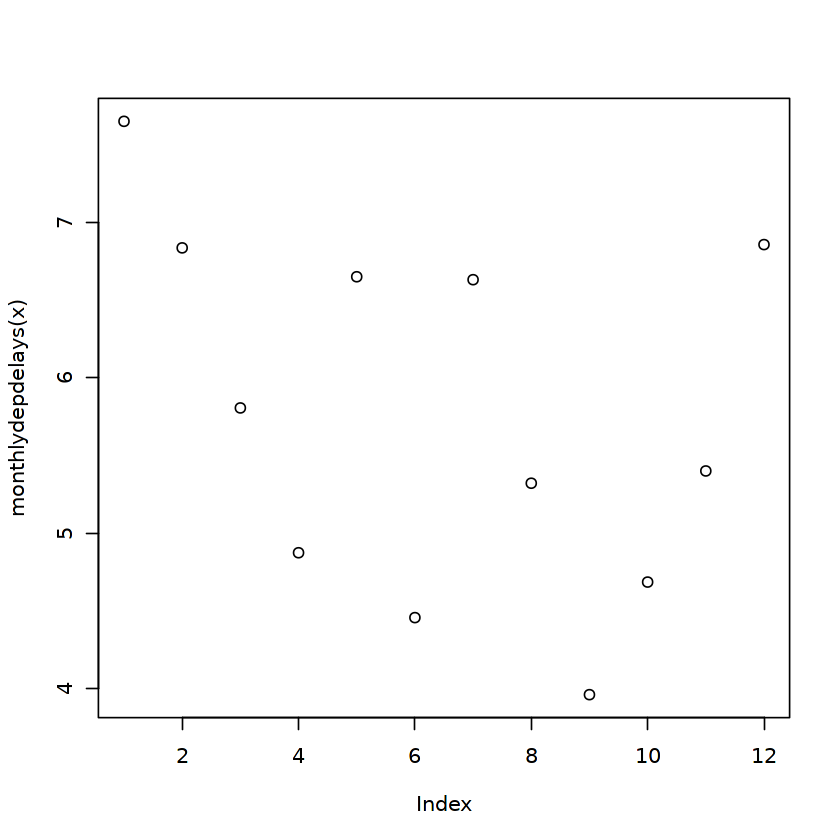

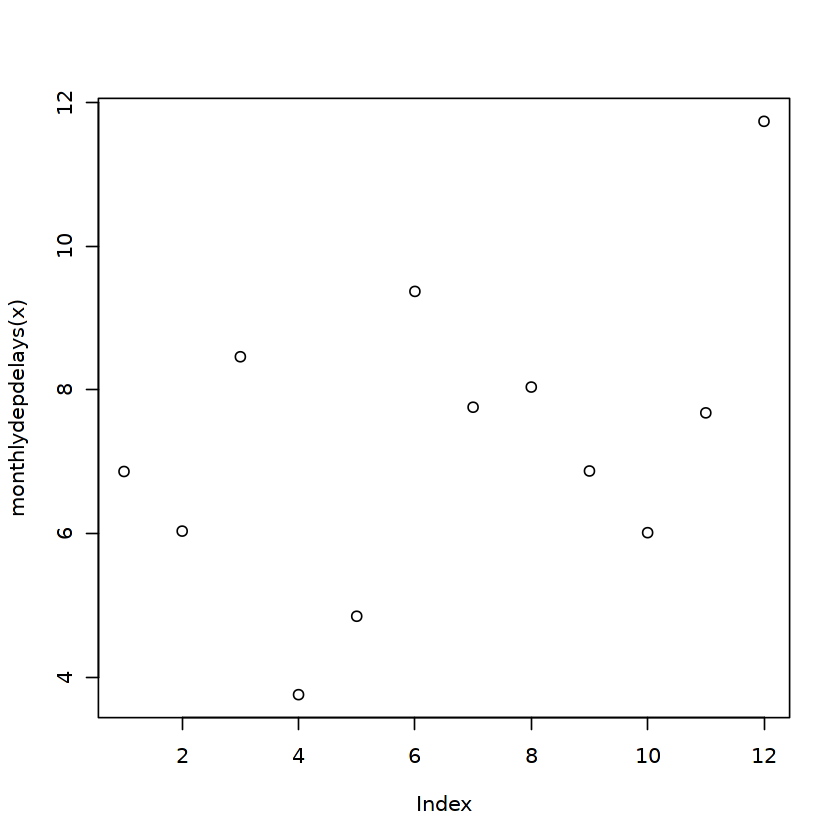

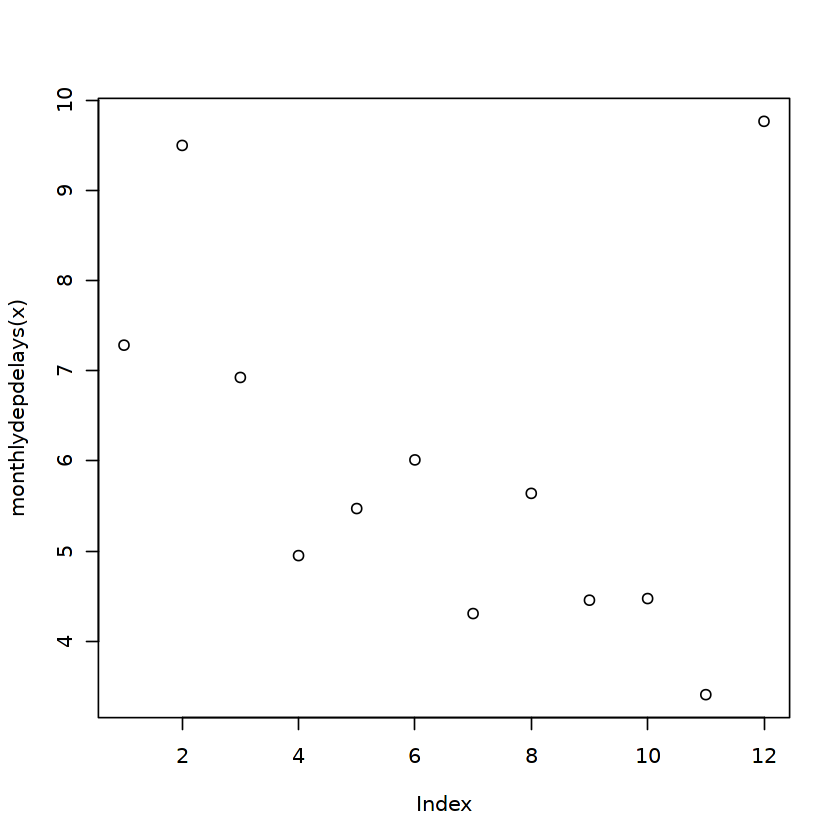

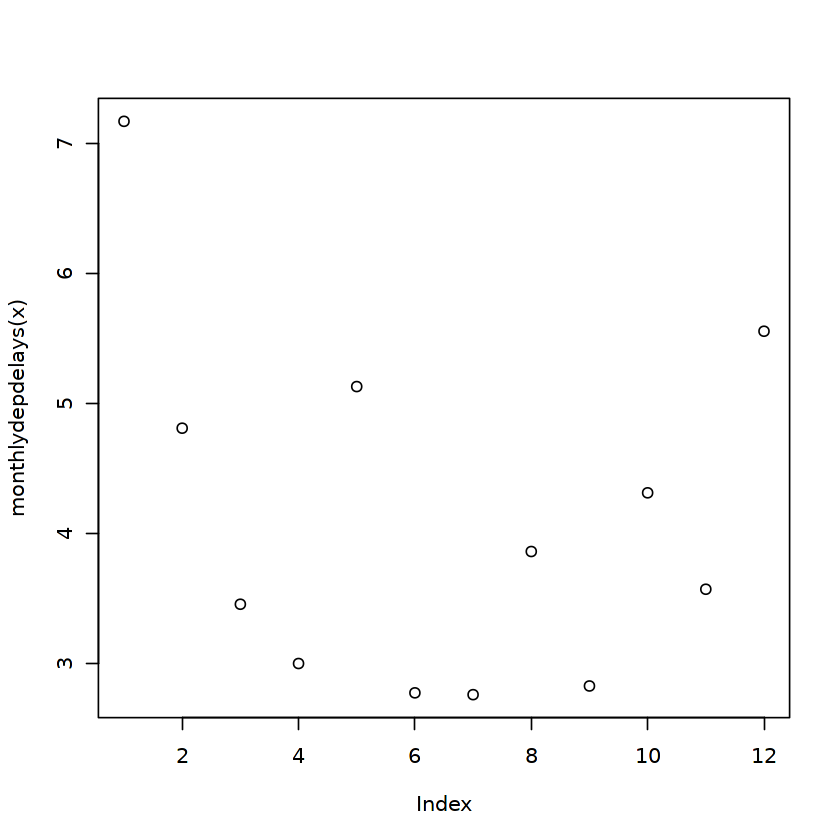

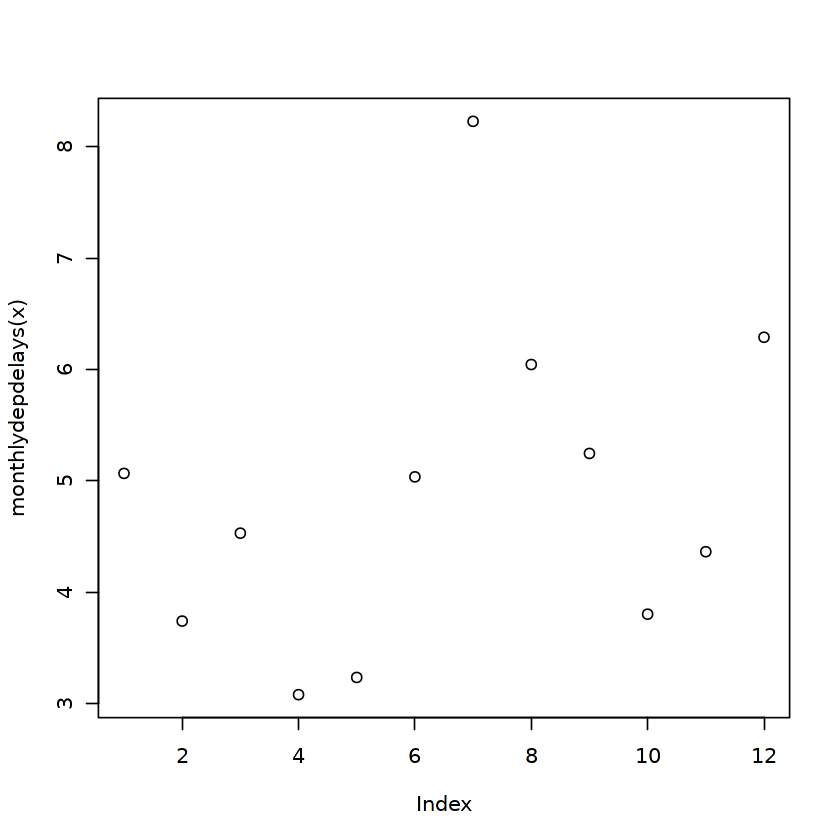

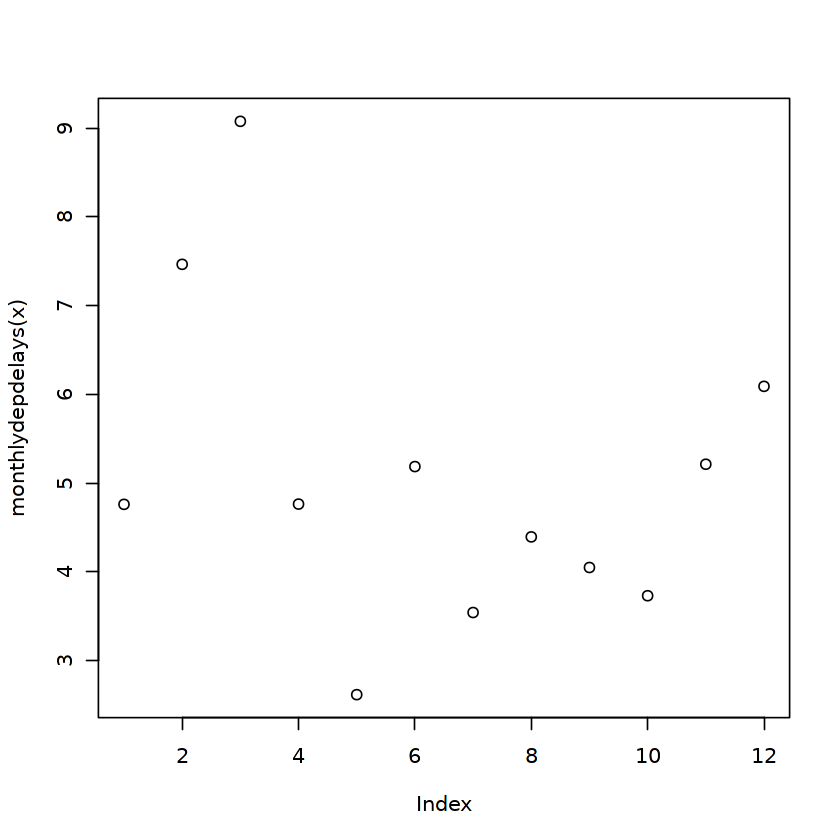

In [7]:
# plot for the results of monthlydepdelays for the years 1988 through 1993
myresults <- sapply(1988:1993, function(x) plot(monthlydepdelays(x)))

Markdown notes and sentences and analysis written here.

## Question 3

In [15]:
myindycities <- function(myyear) {
    # V9 for city and V10 for state V15 for donations
    myDF <- fread(paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt"), quote="", select = c(9, 10, 15))
    
    # assigning these cols names
    names(myDF) <- c("city", "state", "donation")
    
    # filtering IN and adding donations by cities
    indiana_data <- myDF[state == "IN"]
    city_donations <- tapply(indiana_data$donation, indiana_data$city, sum, na.rm = TRUE)
    
    # sorting the total donations in descending order and get the top 10
    top_cities <- head(sort(city_donations, decreasing = TRUE), 10)
    
    # return top 10 cities 
    return(sort(top_cities))
}

In [16]:
myindydonations(1984)

FT WAYNE  TERRE HAUTE       CARMEL   EVANSVILLE   SOUTH BEND       INDPLS 
       44665        52650        53200        65250        68387        76520 
  FORT WAYNE      ELKHART       MUNCIE INDIANAPOLIS 
       80882        93171       104260       511935

### myindydonations for 1980, 1986, and 1992

In [17]:
myindydonations(1980)

LAFAYETTE   SOUTH BEND     FT WAYNE       INDPLS       CARMEL   FORT WAYNE 
       49851        68332        70174        76396        85872        87115 
  EVANSVILLE      ELKHART       MUNCIE INDIANAPOLIS 
       94605       111385       159897       753547

In [18]:
myindydonations(1986)

COLUMBUS   ZIONSVILLE  TERRE HAUTE       CARMEL   SOUTH BEND   EVANSVILLE 
       40400        50900        62361        75993        81841        84815 
     ELKHART       MUNCIE   FORT WAYNE INDIANAPOLIS 
      100350       100433       149194       995379

In [19]:
myindydonations(1992)

ZIONSVILLE  BLOOMINGTON     COLUMBUS      ELKHART       MUNCIE   SOUTH BEND 
       94370       121733       143096       196432       251164       274397 
  EVANSVILLE       CARMEL   FORT WAYNE INDIANAPOLIS 
      308566       384683       524980      2583618

Markdown notes and sentences and analysis written here.

## Question 4

In [20]:
myresults <- lapply( seq(1984,1994,by=2), myindycities )  # 2 for every even numbered years
names(myresults) <- seq(1984,1994,by=2) 
myresults

$`1984`
    FT WAYNE  TERRE HAUTE       CARMEL   EVANSVILLE   SOUTH BEND       INDPLS 
       44665        52650        53200        65250        68387        76520 
  FORT WAYNE      ELKHART       MUNCIE INDIANAPOLIS 
       80882        93171       104260       511935 

$`1986`
    COLUMBUS   ZIONSVILLE  TERRE HAUTE       CARMEL   SOUTH BEND   EVANSVILLE 
       40400        50900        62361        75993        81841        84815 
     ELKHART       MUNCIE   FORT WAYNE INDIANAPOLIS 
      100350       100433       149194       995379 

$`1988`
 TERRE HAUTE   ZIONSVILLE   EVANSVILLE     COLUMBUS       CARMEL       MUNCIE 
       77425        88735        90893       124308       148438       156335 
     ELKHART   SOUTH BEND   FORT WAYNE INDIANAPOLIS 
      167767       185771       189037      1231113 

$`1990`
  ZIONSVILLE  BLOOMINGTON      ELKHART   EVANSVILLE     COLUMBUS   SOUTH BEND 
       61715        76821       150274       156916       158797       179821 
      MUNCIE       CARMEL   FORT WAYNE INDIANAPOLIS 
      206123       210213       708475      1637113 

$`1992`
  ZIONSVILLE  BLOOMINGTON     COLUMBUS      ELKHART       MUNCIE   SOUTH BEND 
       94370       121733       143096       196432       251164       274397 
  EVANSVILLE       CARMEL   FORT WAYNE INDIANAPOLIS 
      308566       384683       524980      2583618 

$`1994`
 BLOOMINGTON MERRILLVILLE   ZIONSVILLE     COLUMBUS       MUNCIE   SOUTH BEND 
      100040       102443       108472       179646       230618       234181 
  EVANSVILLE       CARMEL   FORT WAYNE INDIANAPOLIS 
      272368       355784       383573      2420038

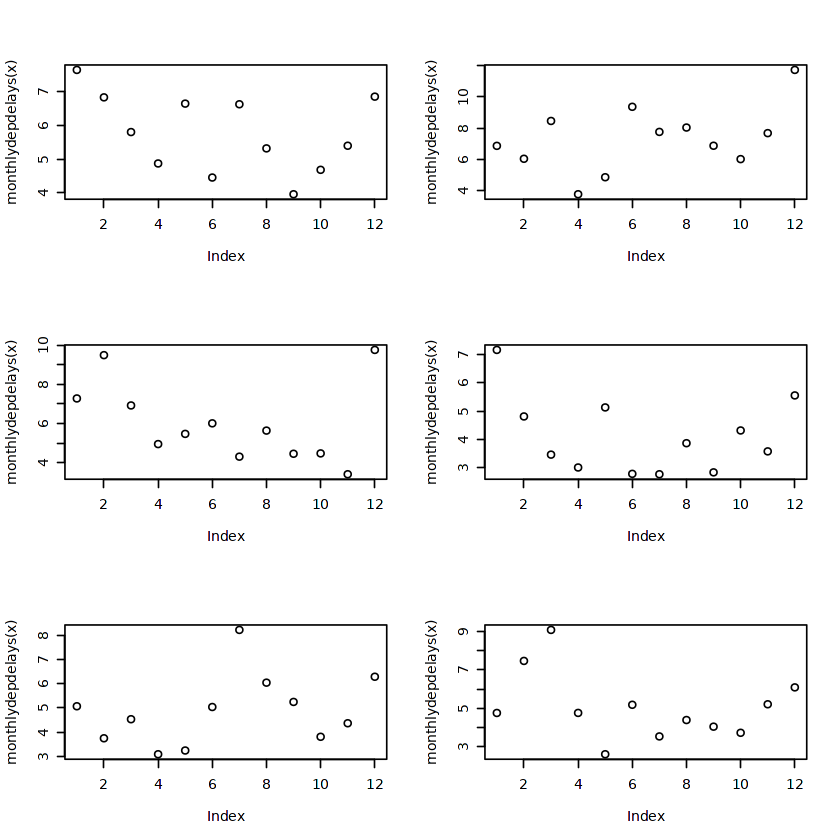

In [21]:
# prep to plot dot plot
par(mfrow=c(3,2))
myresults <- sapply(1988:1993, function(x) plot(monthlydepdelays(x)))

Markdown notes and sentences and analysis written here.

## Question 5

In [22]:
# code here
myavgstars <- function(company) {
  # file path for the company's review file
  filepath <- paste0("/anvil/projects/tdm/data/icecream/", company, "/reviews.csv")
  
  # reading the reviews CSV file
  reviews <- fread(filepath)
  
  # computing the average number of stars
  avg_stars <- mean(reviews$stars, na.rm = TRUE)
  
  return(avg_stars)
}

### testing out the `myavgstars` function

In [23]:
# companies to be observed
mycompanies <- c("bj", "breyers", "hd", "talenti")

# apply the myavgstars function to each company and get the results
average_stars <- sapply(mycompanies, myavgstars)

print(average_stars)

      bj  breyers       hd  talenti 
4.305804 4.027961 4.218475 4.311624 


Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.